In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from langdetect import detect_langs
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from nltk import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
import spacy
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('ratebeer.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,name,id,brewerID,abv,style,appearance,aroma,palate,taste,overall,time,profileName,reviewtext
0,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,5-Apr,10-Jun,5-Mar,10-Jun,13/20,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
1,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,5-Apr,10-Jun,5-Apr,10-Jul,13/20,1157241600,TomDecapolis,On tap at the John Harvards in Springfield PA....
2,John Harvards Cristal Pilsner,71716,8481,5,Bohemian Pilsener,5-Apr,10-May,5-Mar,10-Jun,14/20,958694400,PhillyBeer2112,"UPDATED: FEB 19, 2003 Springfield, PA. I've ne..."
3,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Kölsch,5-Feb,10-Apr,5-Feb,10-Apr,20-Aug,1157587200,TomDecapolis,On tap the Springfield PA location billed as t...
4,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Kölsch,5-Feb,10-Apr,5-Feb,10-Apr,20-Aug,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."


In [4]:
df_1 = df.sample(frac=0.25)

In [5]:
df_1.shape

(262144, 13)

In [6]:
df_2 = df.sample(frac=0.05)
df_2.shape

(52429, 13)

In [7]:
df_3 = df_2[['name', 'reviewtext']]

In [8]:
df_3.head()

,name,reviewtext
980465,Deschutes Obsidian Stout,A 12oz bottle. The beer poured a black body wi...
623614,Ayinger Celebrator Doppelbock,"This rich beer has chocolate, caramel and coff..."
106778,Highland Thunderstruck Coffee Porter,There are definitely hints of chocolate. The ...
2623,Hirschbrauerei Ergenzingen Hirschle Bock,330 ml flip-top bottle in Germany at home than...
581296,Braustelle Ehrenfelder Alt,"Cask, Swan and Rushes, Leicester. Dark brown ..."


In [9]:
df_3 = df_3.rename(columns={'reviewtext': 'review'})

In [10]:
# length of the reviews
length_reviews = df_3.review.str.len()

In [11]:
df_3['length'] = length_reviews

In [12]:
df_3.head()

,name,review,length
980465,Deschutes Obsidian Stout,A 12oz bottle. The beer poured a black body wi...,151.0
623614,Ayinger Celebrator Doppelbock,"This rich beer has chocolate, caramel and coff...",330.0
106778,Highland Thunderstruck Coffee Porter,There are definitely hints of chocolate. The ...,524.0
2623,Hirschbrauerei Ergenzingen Hirschle Bock,330 ml flip-top bottle in Germany at home than...,259.0
581296,Braustelle Ehrenfelder Alt,"Cask, Swan and Rushes, Leicester. Dark brown ...",286.0


In [13]:
avg_length = df_3.length.mean()
print('Average Length: {}'.format(avg_length))

Average Length: 308.7688136111058


In [14]:
longest_review = df_3['length'].max()
shortest_review = df_3['length'].min()
print('Longest Review: {}'.format(longest_review))
print('Shortest Review: {}'.format(shortest_review))

Longest Review: 6358.0
Shortest Review: 6.0


In [15]:
df_4 = df_3.sort_values(by=['length'], ascending=False)
df_4.head()

,name,review,length
248253,Stone Double Bastard Ale,"UPDATED: DEC 15, 2009 \tName: Double Bastard\t...",6358.0
264929,Stone Old Guardian &#40;Vintages 2004 and late...,"UPDATED: JAN 27, 2007 Jan 2007, bottled.\t\tLo...",3696.0
663041,Cigar City Lil’ Warmer,Filled Last night; Sampled January 2011\tA vig...,3582.0
804054,Blue Moon Belgian White Ale,If a beer is usually drunk with a slice of a c...,3351.0
269525,Stone 13th Anniversary Ale,A soft pour still nets me an almost three-fing...,3277.0


In [16]:
# Detect the language of the review

In [17]:
reviews = df_4.sample(frac=0.50)
reviews.head()

,name,review,length
641178,Weyerbacher Merry Monks Ale,Clear gold color with a fluffy white head that...,159.0
882475,21st Amendment Brew Free or Die IPA,This is my first beer review! I enjoyed this I...,576.0
475309,AleSmith Decadence 2009,Bottle. Brown pour with beige head. Aroma is...,255.0
51123,Bad Münstereifeler Vollmondbier,2 l bottle @ LCRBM 2008. Grassy hops in this a...,144.0
134562,Badger Golden Champion Ale,bottle. golden color. medium fluffy head. swee...,85.0


In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26214 entries, 641178 to 774468
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    26214 non-null  object 
 1   review  26182 non-null  object 
 2   length  26182 non-null  float64
dtypes: float64(1), object(2)
memory usage: 819.2+ KB


In [19]:
review = str(reviews.review)

In [20]:
languages = []

for r in range(len(reviews)):
    languages.append(detect_langs(reviews.iloc[r, 0]))

In [21]:
languages = [str(lang).split(':')[0][1] for lang in languages]

In [22]:
reviews['lang'] = languages

In [23]:
reviews.head()

,name,review,length,lang
641178,Weyerbacher Merry Monks Ale,Clear gold color with a fluffy white head that...,159.0,d
882475,21st Amendment Brew Free or Die IPA,This is my first beer review! I enjoyed this I...,576.0,a
475309,AleSmith Decadence 2009,Bottle. Brown pour with beige head. Aroma is...,255.0,e
51123,Bad Münstereifeler Vollmondbier,2 l bottle @ LCRBM 2008. Grassy hops in this a...,144.0,d
134562,Badger Golden Champion Ale,bottle. golden color. medium fluffy head. swee...,85.0,e


In [24]:
# Removing non english reviews and Keeping only reviews in english

reviews_e = reviews.loc[lambda reviews: reviews['lang'] == 'e']
reviews_e

,name,review,length,lang
475309,AleSmith Decadence 2009,Bottle. Brown pour with beige head. Aroma is...,255.0,e
134562,Badger Golden Champion Ale,bottle. golden color. medium fluffy head. swee...,85.0,e
604402,Half Moon Bay Winter Soulstice,Golden brown with a fizzy white head. Caramel ...,111.0,e
582232,Vendia No. 2 Pilsner,"grass, yellow,clear, white foam, light sweetne...",116.0,e
864633,Northwoods Poplar Porter,color is black but very translucent and fleeti...,268.0,e
...,...,...,...,...
585376,Spearhead Hawaiian Style Pale Ale,On tap at Volo \tAroma aromatic high alpha wes...,495.0,e
74646,Lagunitas Censored &#40;Kronik&#41;,"UPDATED: JAN 1, 2006 defineately one of the fi...",140.0,e
898507,Samuel Smiths Oatmeal Stout,"Very dark frothy beer, amazingly smooth taste ...",220.0,e
891241,Samuel Smiths Taddy Lager,Draught @ The Chandos. Pours golden with decen...,174.0,e


In [25]:
avg_length_e = reviews_e.length.mean()
longest_review_e = reviews_e['length'].max()
shortest_review_e = reviews_e['length'].min()
print('Average Length: {}'.format(avg_length_e))
print('Longest Review: {}'.format(longest_review_e))
print('Shortest Review: {}'.format(shortest_review_e))

Average Length: 322.1615473775717
Longest Review: 3696.0
Shortest Review: 6.0


In [26]:
reviews_e['review'] = reviews_e['review'].astype(str)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
reviews_e['sentiment'] = round(reviews_e['review'].apply(lambda x: TextBlob(x).sentiment[0]),2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
reviews_e

,name,review,length,lang,sentiment
475309,AleSmith Decadence 2009,Bottle. Brown pour with beige head. Aroma is...,255.0,e,-0.15
134562,Badger Golden Champion Ale,bottle. golden color. medium fluffy head. swee...,85.0,e,0.15
604402,Half Moon Bay Winter Soulstice,Golden brown with a fizzy white head. Caramel ...,111.0,e,0.21
582232,Vendia No. 2 Pilsner,"grass, yellow,clear, white foam, light sweetne...",116.0,e,0.09
864633,Northwoods Poplar Porter,color is black but very translucent and fleeti...,268.0,e,-0.20
...,...,...,...,...,...
585376,Spearhead Hawaiian Style Pale Ale,On tap at Volo \tAroma aromatic high alpha wes...,495.0,e,0.20
74646,Lagunitas Censored &#40;Kronik&#41;,"UPDATED: JAN 1, 2006 defineately one of the fi...",140.0,e,0.47
898507,Samuel Smiths Oatmeal Stout,"Very dark frothy beer, amazingly smooth taste ...",220.0,e,0.07
891241,Samuel Smiths Taddy Lager,Draught @ The Chandos. Pours golden with decen...,174.0,e,-0.07


In [29]:
reviews_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13814 entries, 475309 to 589182
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       13814 non-null  object 
 1   review     13814 non-null  object 
 2   length     13804 non-null  float64
 3   lang       13814 non-null  object 
 4   sentiment  13814 non-null  float64
dtypes: float64(2), object(3)
memory usage: 647.5+ KB


In [111]:
reviews_1 = reviews_e

In [112]:
reviews_1.reset_index(drop=True, inplace=True)

In [113]:
reviews_1.head()

,name,review,length,lang,sentiment,sentiment_1
0,AleSmith Decadence 2009,Bottle. Brown pour with beige head. Aroma is...,255.0,e,-0.15,1
1,Badger Golden Champion Ale,bottle. golden color. medium fluffy head. swee...,85.0,e,0.15,2
2,Half Moon Bay Winter Soulstice,Golden brown with a fizzy white head. Caramel ...,111.0,e,0.21,2
3,Vendia No. 2 Pilsner,"grass, yellow,clear, white foam, light sweetne...",116.0,e,0.09,0
4,Northwoods Poplar Porter,color is black but very translucent and fleeti...,268.0,e,-0.20,1


In [114]:
reviews_1.iloc[0]

name                                     AleSmith Decadence 2009
review         Bottle.  Brown pour with beige head.  Aroma is...
length                                                       255
lang                                                           e
sentiment                                                  -0.15
sentiment_1                                                    1
Name: 0, dtype: object

In [115]:
sentiment_1 = []

for i in range(len(reviews_1)):
    if reviews_1.sentiment[i] >= 0.10:
        sentiment_1.append(2)
    elif reviews_1.sentiment[i] >= -0.10:
        sentiment_1.append(0)
    else:
        sentiment_1.append(1)

In [116]:
reviews_1['sentiment_1'] = sentiment_1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
reviews_1

,name,review,length,lang,sentiment,sentiment_1
0,AleSmith Decadence 2009,Bottle. Brown pour with beige head. Aroma is...,255.0,e,-0.15,1
1,Badger Golden Champion Ale,bottle. golden color. medium fluffy head. swee...,85.0,e,0.15,2
2,Half Moon Bay Winter Soulstice,Golden brown with a fizzy white head. Caramel ...,111.0,e,0.21,2
3,Vendia No. 2 Pilsner,"grass, yellow,clear, white foam, light sweetne...",116.0,e,0.09,0
4,Northwoods Poplar Porter,color is black but very translucent and fleeti...,268.0,e,-0.20,1
...,...,...,...,...,...,...
13809,Spearhead Hawaiian Style Pale Ale,On tap at Volo \tAroma aromatic high alpha wes...,495.0,e,0.20,2
13810,Lagunitas Censored &#40;Kronik&#41;,"UPDATED: JAN 1, 2006 defineately one of the fi...",140.0,e,0.47,2
13811,Samuel Smiths Oatmeal Stout,"Very dark frothy beer, amazingly smooth taste ...",220.0,e,0.07,0
13812,Samuel Smiths Taddy Lager,Draught @ The Chandos. Pours golden with decen...,174.0,e,-0.07,0


In [118]:
reviews_1['sentiment_1'].value_counts()

2    8970
0    4156
1     688
Name: sentiment_1, dtype: int64

In [119]:
reviews_1.sentiment_1[0]

1

In [120]:
range(len(reviews_1.sentiment_1))

range(0, 13814)

In [123]:
positive = []
negative = []
neutral = []

for i in range(len(reviews_1.sentiment_1)):
    if reviews_1.sentiment_1[i] == 2:
        positive.append(review[i])
    elif reviews_1.sentiment_1[i] == 1:
        negative.append(review[i])
    else:
        neutral.append(review[i])
   

IndexError: string index out of range

In [104]:
# print(len(positive))
# print(len(negative))
# print(len(neutral))

In [103]:
# positive_string = str(positive)
# negative_string = str(negative)
# neutral_string = str(neutral)

In [45]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [46]:
my_stop_words = ENGLISH_STOP_WORDS.union(['Aroma', 'head', 'is'])

In [47]:
positive_cloud = WordCloud(stopwords = my_stop_words).generate(positive_string)

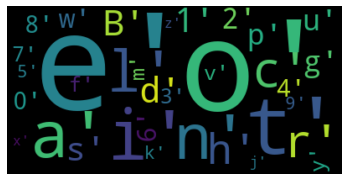

In [48]:
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

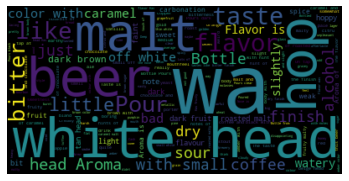

In [137]:
negative_cloud = WordCloud(stopwords=my_stop_words).generate(negative_string)
plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

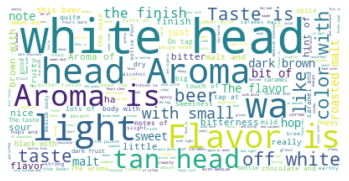

In [138]:
neutral_cloud = WordCloud(background_color='white', stopwords=my_stop_words).generate(neutral_string)
plt.imshow(neutral_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [140]:
# Tokenizing words

In [124]:
word_tokens = [word_tokenize(review) for review in reviews_1.review]

In [125]:
cleaned_tokens = [[word for word in items if word.isalpha()]for items in word_tokens]

In [126]:
print(len(word_tokens))
print(len(cleaned_tokens))

13814
13814


In [127]:
print(word_tokens[0])

['Bottle', '.', 'Brown', 'pour', 'with', 'beige', 'head', '.', 'Aroma', 'is', 'dark', 'malt', ',', 'lots', 'of', 'bubble-gum', 'sugar', ',', 'some', 'pit', 'fruit', ',', 'toffee', '.', 'Palate', 'is', 'a', 'little', 'thin', ',', 'watery', 'and', 'disappointing', '.', 'Flavors', 'are', 'there', ',', 'but', 'they', 'dont', 'come', 'together', 'and', 'the', 'yeast', 'kind', 'of', 'spoils', 'the', 'finish', 'for', 'me', '.']


In [128]:
print(cleaned_tokens[0])

['Bottle', 'Brown', 'pour', 'with', 'beige', 'head', 'Aroma', 'is', 'dark', 'malt', 'lots', 'of', 'sugar', 'some', 'pit', 'fruit', 'toffee', 'Palate', 'is', 'a', 'little', 'thin', 'watery', 'and', 'disappointing', 'Flavors', 'are', 'there', 'but', 'they', 'dont', 'come', 'together', 'and', 'the', 'yeast', 'kind', 'of', 'spoils', 'the', 'finish', 'for', 'me']


In [129]:
print(len(word_tokens[0]))
print(len(cleaned_tokens[0]))

54
43


In [174]:
# Stemming & Lemmatizing

In [130]:
lemmatizer = WordNetLemmatizer()

In [131]:
lem_tokens = [[lemmatizer.lemmatize(word) for word in token]for token in cleaned_tokens]

In [132]:
print(len(lem_tokens[0]))

43


In [133]:
porter = PorterStemmer()

In [134]:
stemmed_tokens = [[porter.stem(word) for word in token]for token in cleaned_tokens]

In [135]:
print(len(stemmed_tokens[0]))

43


In [187]:
# nlp = spacy.load('en_core_web_sm')

In [196]:
# review_string = str(reviews_1.review)
# print(review_string)

In [189]:
# doc = nlp(review_string)
# len(doc)

In [190]:
# lemmas = [token.lemma_ for token in doc]

In [191]:
# len(lemmas[0])

In [192]:
# a_lemmas = [lemma for lemma in lemmas if lemma.isalpha()]

In [193]:
# print(' '.join(a_lemmas))

In [194]:
# len(a_lemmas[0])

In [136]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000, stop_words='english')

In [137]:
vectorizer.fit(reviews_1.review)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [138]:
review_text = vectorizer.transform(reviews_1.review)

In [139]:
review_df = pd.DataFrame(review_text.toarray(), columns=vectorizer.get_feature_names())

In [140]:
review_df

,00,01,02,03,04,05,06,07,07 pours,08,...,youre,youve,yuck,yum,yummy,zero,zero head,zest,zesty,zing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
review_df['sentiment'] = reviews_1['sentiment_1']

In [142]:
review_df.head()

,00,01,02,03,04,05,06,07,07 pours,08,...,youve,yuck,yum,yummy,zero,zero head,zest,zesty,zing,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [143]:
y = review_df['sentiment']

In [144]:
X = review_df.drop('sentiment', axis=1)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [146]:
lr = LogisticRegression()

In [147]:
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
y_pred = lr.predict(X_test)

In [150]:
print("Accuracy_score: \n {}".format(accuracy_score(y_test, y_pred)))

Accuracy_score: 
 0.7730727470141151


In [151]:
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))

Confusion Matrix: 
 [[ 453    0  378]
 [ 113    5   20]
 [ 116    0 1678]]


In [166]:
#  Increase the features to 50000

In [153]:
vectorizer_1 = TfidfVectorizer(ngram_range=(1,2), max_features=50000, stop_words='english')
vectorizer_1.fit(reviews_1.review)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=50000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [154]:
review_text_1 = vectorizer_1.transform(reviews_1.review)
review_df_1 = pd.DataFrame(review_text_1.toarray(), columns=vectorizer_1.get_feature_names())

In [155]:
review_df_1.head()

,00,00 abv,01,01 02,01 06,01 07,01 08,01 09,01 12,01 17,...,zima,zing,zingy,zinister,zip,zippy,zippy carbonation,zis,zum,zum ende
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
review_df_1['sentiment'] = reviews_1['sentiment_1']
review_df_1.head()

,00,00 abv,01,01 02,01 06,01 07,01 08,01 09,01 12,01 17,...,zing,zingy,zinister,zip,zippy,zippy carbonation,zis,zum,zum ende,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [161]:
y_1 = review_df_1['sentiment']
X_1 = review_df_1.drop('sentiment', axis=1)

In [162]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y_1)
lr_1 = LogisticRegression()
lr_1.fit(X_train_1, y_train_1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
y_predict = lr_1.predict(X_test_1)

In [164]:
print("Accuracy_score: \n {}".format(accuracy_score(y_test_1, y_predict)))

Accuracy_score: 
 0.7669200144770177


In [167]:
# Random forest with 10000 features


In [169]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [171]:
pred_y = rf.predict(X_test)
print("Accuracy_score: \n {}".format(accuracy_score(y_test, pred_y)))

Accuracy_score: 
 0.7213174086138255
